In [1]:
import ROOT as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit


Welcome to JupyROOT 6.24/02


In [11]:
#insert the file for data extraction

f = r.TFile('results_forAdit_partial_run2c.root')
t = f.Get("LaserEvents/tree")

TFile**		/Users/adit/Google Drive/Internship_ Research/Muon g-2/combined_forAdit_timealigned.root	
 TFile*		/Users/adit/Google Drive/Internship_ Research/Muon g-2/combined_forAdit_timealigned.root	
  TDirectoryFile*		LaserEvents	LaserEvents (LaserEventDumper) folder
   OBJ: TTree	tree	Laser Event Data : 0 at: 0x7fa90fa17510
   KEY: TTree	tree;1	Laser Event Data
  KEY: TDirectoryFile	LaserEvents;1	LaserEvents (LaserEventDumper) folder


In [12]:
# creating a dataframe of all data
rdf = r.RDataFrame("LaserEvents/tree", 'results_forAdit_partial_run2c.root')
df = pd.DataFrame(rdf.AsNumpy())


In [13]:
df.columns

,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtAmp1,lmPmtAmp2,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy,slmPedestal,slmChi2
0,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,0,-99404.104620,...,1244.28,638.28,27700.0,13555.0,5290.0,5478.0,-99406.160620,3837.187198,-1803.181425,21.196002
1,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,1,-99404.141620,...,1244.28,638.28,27700.0,13555.0,5290.0,5478.0,-99406.160620,3837.187198,-1803.181425,21.196002
2,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,2,-99404.232620,...,1244.28,638.28,27700.0,13555.0,5290.0,5478.0,-99406.160620,3837.187198,-1803.181425,21.196002
3,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,3,-99403.935620,...,1244.28,638.28,27700.0,13555.0,5290.0,5478.0,-99406.160620,3837.187198,-1803.181425,21.196002
4,1.555667e+09,1.880835e+11,24928,412,178,0,1,1,4,-99404.069620,...,1244.28,638.28,27700.0,13555.0,5290.0,5478.0,-99406.160620,3837.187198,-1803.181425,21.196002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795511,1.556004e+09,1.767295e+11,25026,418,210,15,1,24,49,493876.345058,...,932.58,574.58,21375.0,12431.0,598613.0,598801.0,493876.383924,2268.550936,-1781.614007,17.812857
37795512,1.556004e+09,1.767295e+11,25026,418,210,15,1,24,50,493876.310157,...,932.58,574.58,21375.0,12431.0,598613.0,598801.0,493876.383924,2268.550936,-1781.614007,17.812857
37795513,1.556004e+09,1.767295e+11,25026,418,210,15,1,24,51,493876.667794,...,932.58,574.58,21375.0,12431.0,598613.0,598801.0,493876.383924,2268.550936,-1781.614007,17.812857
37795514,1.556004e+09,1.767295e+11,25026,418,210,15,1,24,52,493876.613725,...,932.58,574.58,21375.0,12431.0,598613.0,598801.0,493876.383924,2268.550936,-1781.614007,17.812857


In [56]:
df_single = df.loc[df['caloNum']==1].loc[df['xtalNum']==21].loc[df['fillNum']==15]
df_single['timeDiff'] = df['slmTime']-df['sipmTime']
df_single

,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtAmp2,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy,slmPedestal,slmChi2,timeDiff
1002340,1.555305e+09,9.862007e+10,24797,230,15,7,1,1,21,-99425.759178,...,655.12,28396.0,13953.0,5302.0,5490.0,0.000000,4356.985442,-1803.353352,24.305704,99425.759178
1002394,1.555305e+09,9.862007e+10,24797,230,15,7,1,1,21,49890.098854,...,635.32,28130.0,13133.0,154618.0,154806.0,149315.845977,4323.848846,-1803.504192,19.182058,99425.747123
1002448,1.555305e+09,9.862007e+10,24797,230,15,7,1,1,21,197894.088100,...,641.28,27972.0,13594.0,302622.0,302809.0,297319.864528,4240.298252,-1803.554808,16.711277,99425.776428
1002502,1.555305e+09,9.862007e+10,24797,230,15,7,1,1,21,345890.091600,...,652.16,27595.0,14143.0,450618.0,450806.0,445315.840831,4121.370258,-1803.243401,33.408489,99425.749232
1002556,1.555305e+09,9.862007e+10,24797,230,15,7,1,1,21,493885.843767,...,647.22,27767.0,13588.0,598614.0,598801.0,593311.582181,4172.403924,-1803.424781,28.011477,99425.738413
6049561,1.555667e+09,1.629411e+11,24928,353,15,6,1,1,21,-99415.760173,...,653.36,27208.0,13846.0,5298.0,5486.0,0.000000,4024.044032,-1802.539610,15.154352,99415.760173
6049615,1.555667e+09,1.629411e+11,24928,353,15,6,1,1,21,15901.059087,...,668.14,27934.0,14122.0,120615.0,120803.0,115316.816285,4010.163833,-1803.965755,11.571980,99415.757198
6049669,1.555667e+09,1.629411e+11,24928,353,15,6,1,1,21,163905.121751,...,659.36,29595.0,13819.0,268619.0,268807.0,263320.899450,4103.675974,-1802.340062,20.886640,99415.777699
6049723,1.555667e+09,1.629411e+11,24928,353,15,6,1,1,21,311901.007788,...,652.82,28091.0,14004.0,416615.0,416803.0,411316.745109,3986.562779,-1802.132564,15.397730,99415.737321
6049777,1.555667e+09,1.629411e+11,24928,353,15,6,1,1,21,459896.978557,...,671.42,28120.0,14353.0,564611.0,564798.0,559312.753126,3966.252118,-1802.744487,18.246324,99415.774568


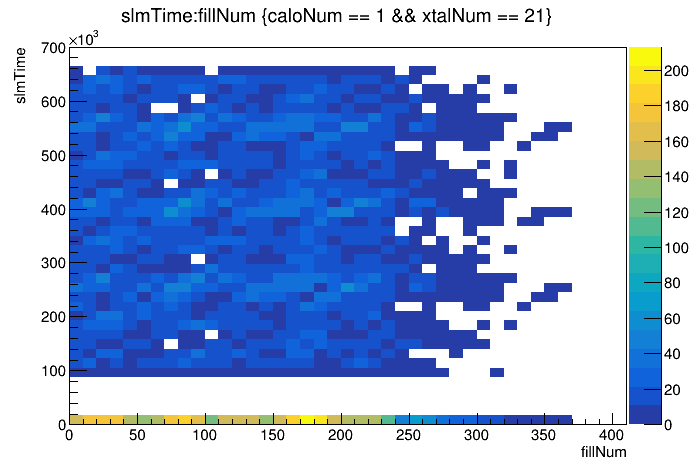

In [57]:
c = r.TCanvas()
t.Draw("slmTime:fillNum", "caloNum == 1 && xtalNum == 21","colz")
c.Draw()

In [32]:
#some variables

caloCount = max(df['caloNum'])
xtalCount = max(df['xtalNum'])

slope_single = np.zeros(1)
std_single = np.zeros(1)

slope_calo = np.zeros(xtalCount+1)
std_calo = np.zeros(xtalCount+1)

slope_all = np.zeros((caloCount,xtalCount+1))
std_all = np.zeros((caloCount,xtalCount+1))

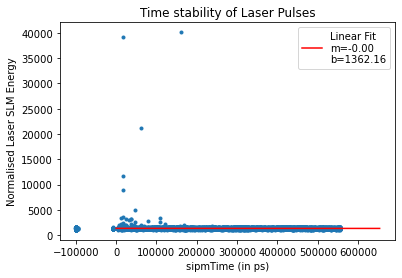

In [64]:
# pick a crystal from a calo and store data
calo =1
xtal = 2

df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal] 

# check if it has an in-fill pulse & filter those without (not neccesary here as we can see all fills qualify)
df_fills = df_xtal.groupby('fillNum').max().reset_index()
syncFills = df_fills[df_fills['slmTime']>0]['s']
df_sags = df_xtal[df_xtal['fillNum'].isin(syncFills['fillNum'])]

# pick the pulse with lowest SLM Time and store it's SLM energy
result = df_sags.loc[df_sags.groupby('fillNum').idxmin()['slmTime']][['fillNum','slmEnergy']]
result.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )

# Normalise all other pulses' SLM energy in the given fill
df_normal = df_xtal.merge(result, on='fillNum', how='right')

# graph ratio of SiPM energy & normalized SLM energy -vs- time (p.s. add labels and axes)
fig,ax = plt.subplots()
ax.plot(df_normal['sipmTime'], df_normal['syncEnergy']*df_normal['sipmEnergy']/df_normal['slmEnergy'],".")
ax.set_title("Time stability of Laser Pulses")
ax.set_xlabel("sipmTime (in ps)")
ax.set_ylabel("Normalised Laser SLM Energy")

# fit a curve (linear for now) through the stability of time 
def func(x,m,b):
    return m*x + b 

initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, df_normal['slmTime'], df_normal['syncEnergy']*df_normal['sipmEnergy']/df_normal['slmEnergy'], p0=initial_guess)
xfit = np.linspace(np.amin(df_normal['slmTime']),np.amax(df_normal['slmTime']))
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'r-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")
plt.legend()


# store time dependent coefficients and deviations in an arrays
slope_single =pars[0]
std_single = np.sqrt(pcov[1,1])


##check for SLM > 1000
df_temp = df_normal[df_normal['syncEnergy']*df_normal['sipmEnergy']/df_normal['slmEnergy'] > 1000]

In [65]:
ax.plot(df_temp['sipmTime'],df_temp['syncEnergy']*df_temp['sipmEnergy']/df_temp['slmEnergy'] ,".")

In [52]:
print(slope_single)
print(std_single)
# df very large so 5.69 means more than 99.9% confidence

-2.5500567924628423e-05
5.6905276042754505


/var/folders/bg/h849yg0s2771n7mypkp93k680000gn/T/ipykernel_37118/3720141590.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots()


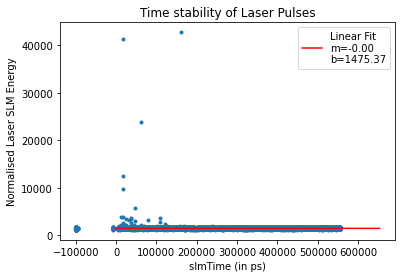

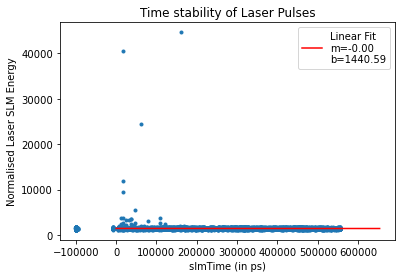

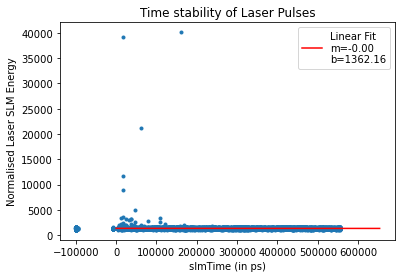

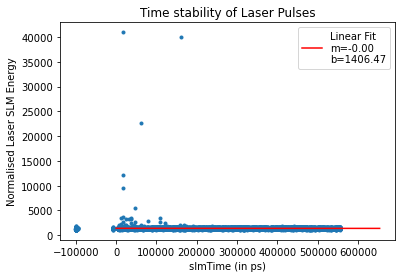

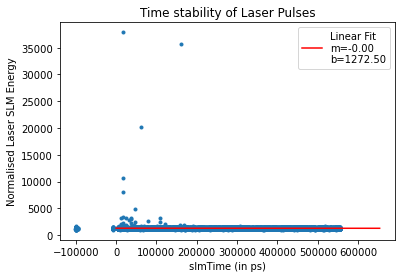

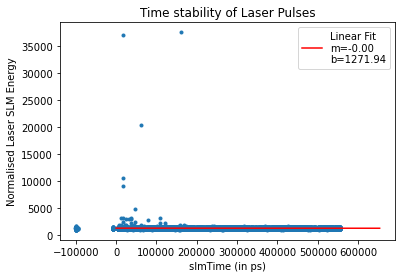

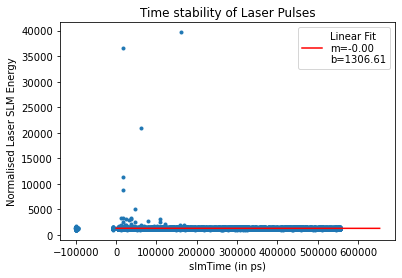

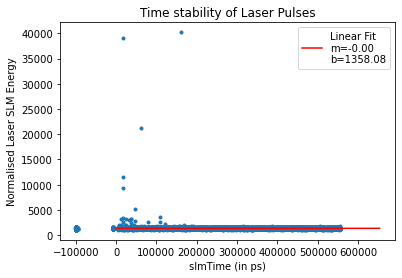

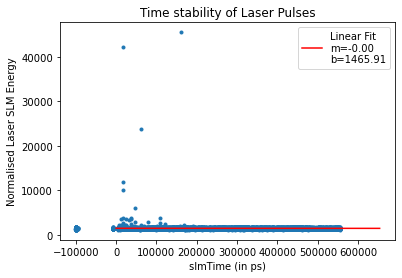

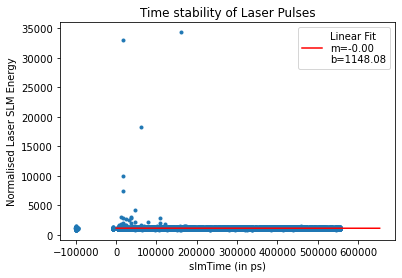

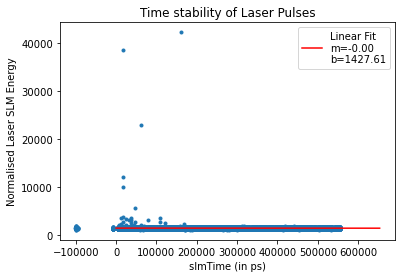

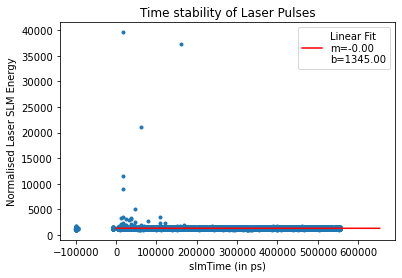

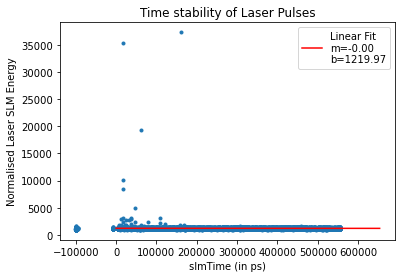

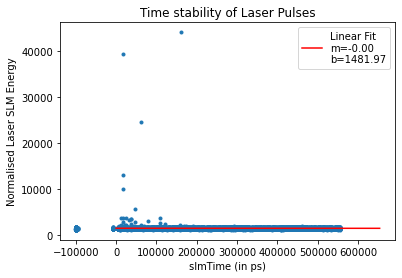

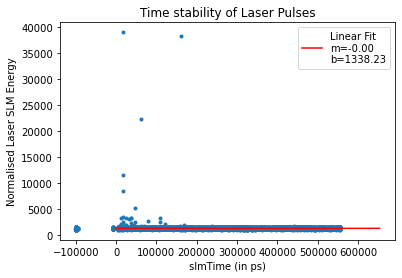

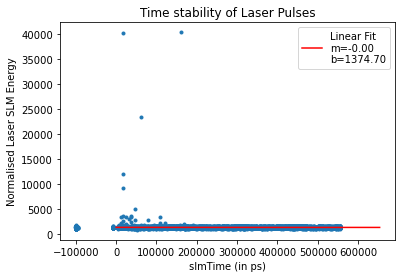

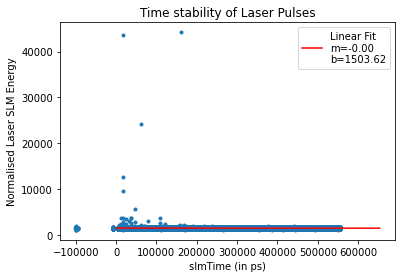

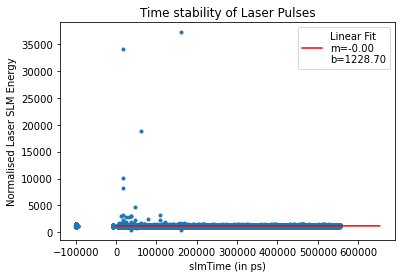

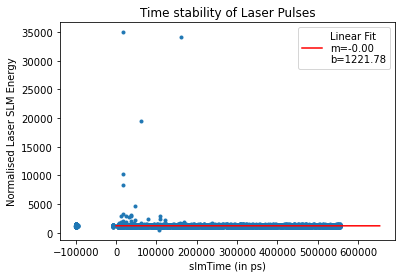

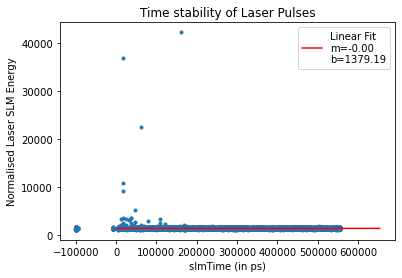

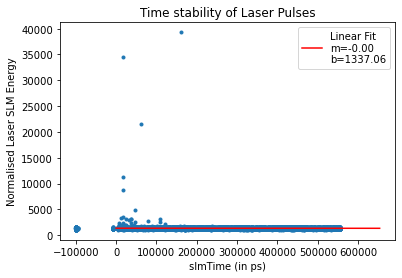

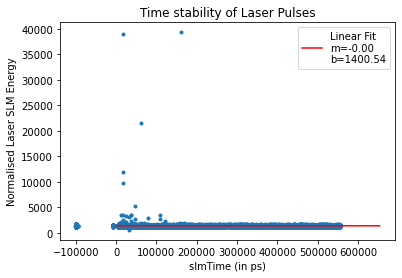

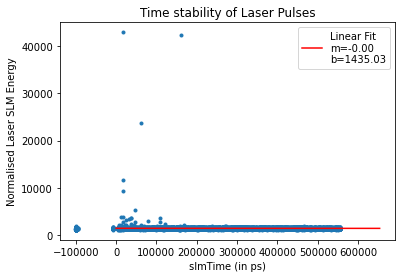

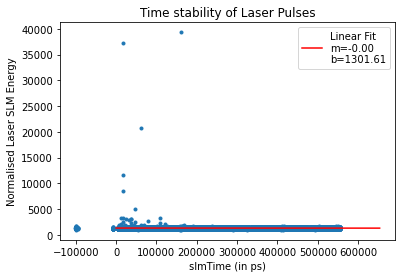

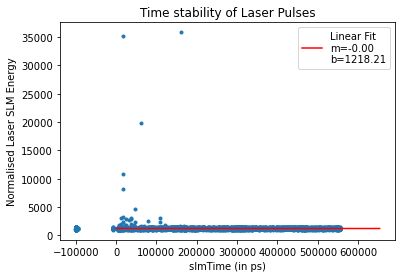

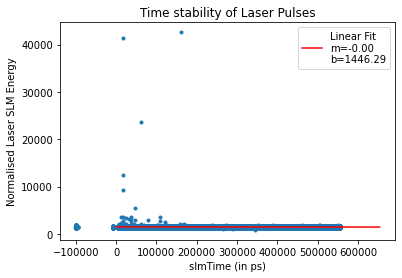

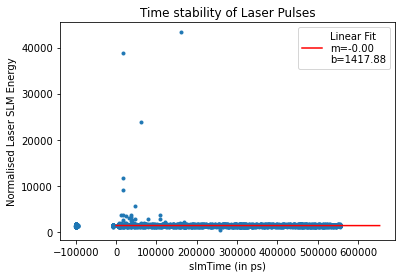

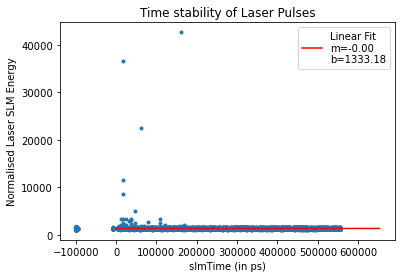

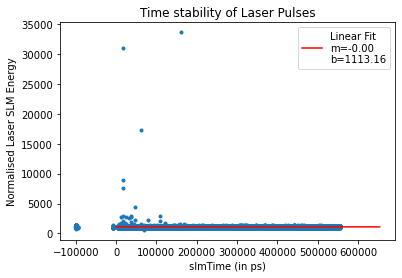

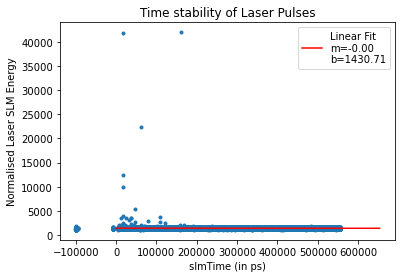

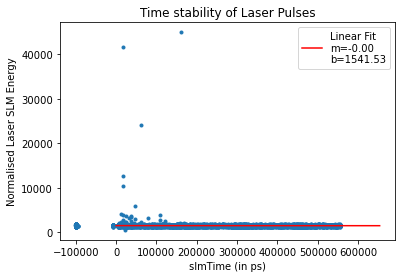

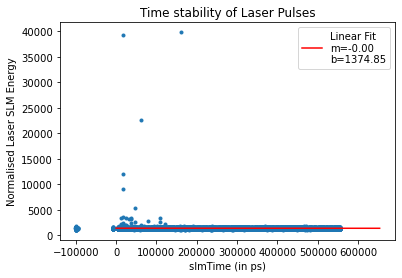

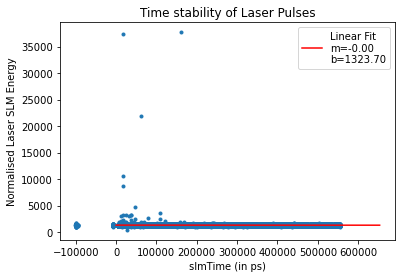

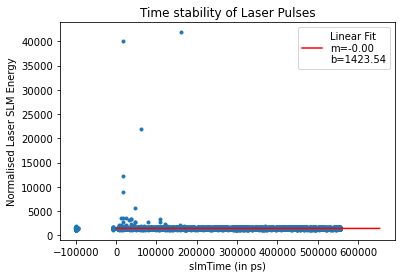

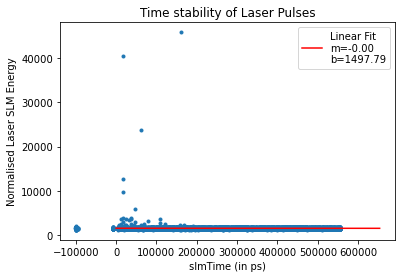

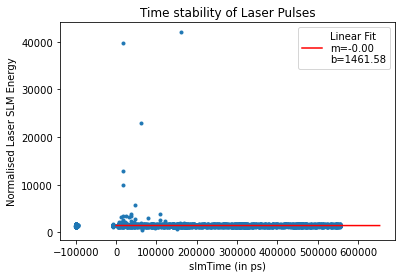

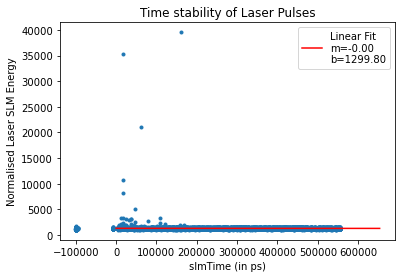

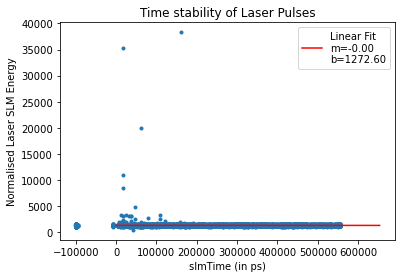

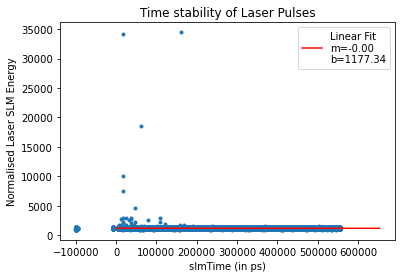

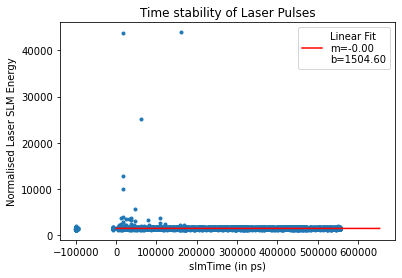

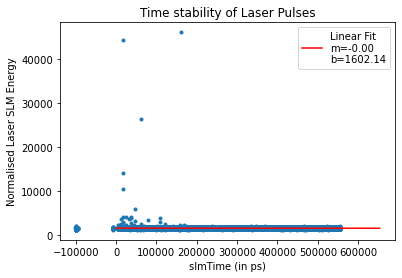

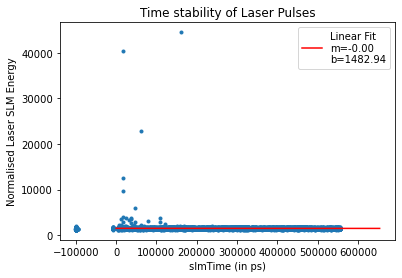

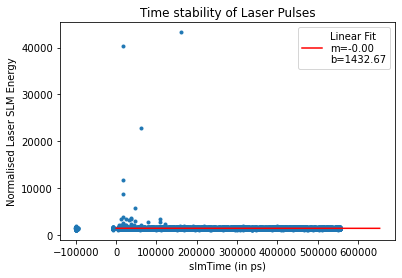

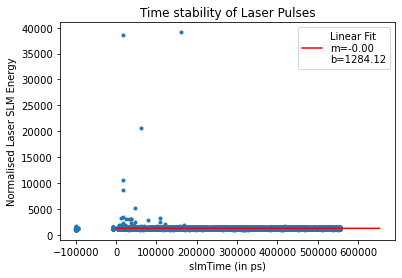

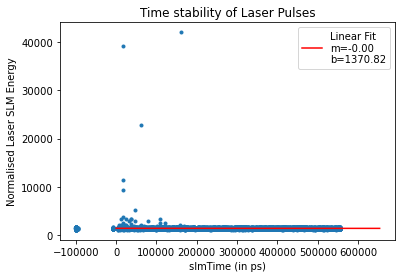

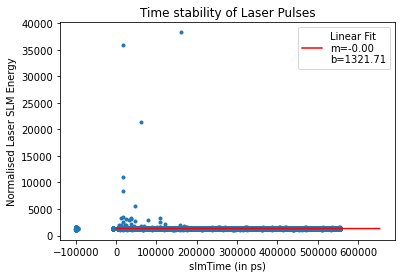

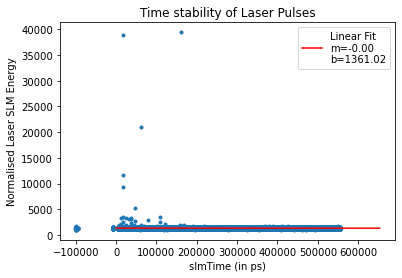

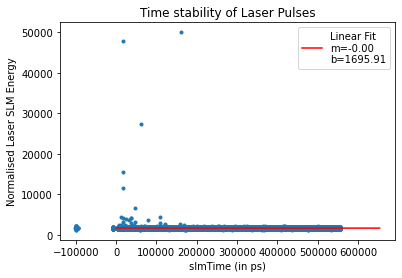

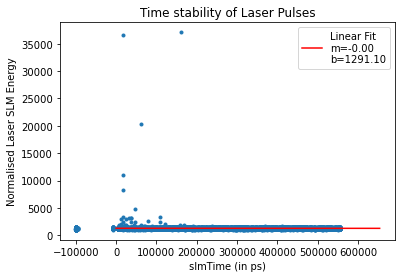

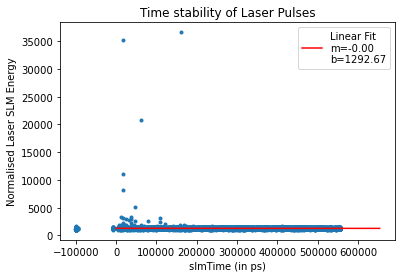

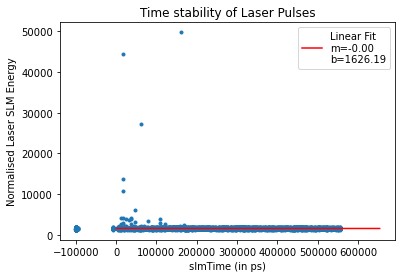

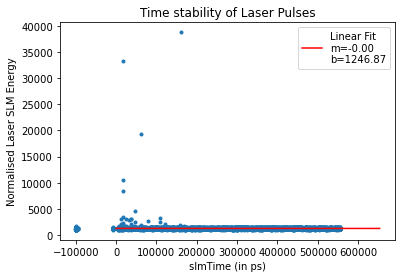

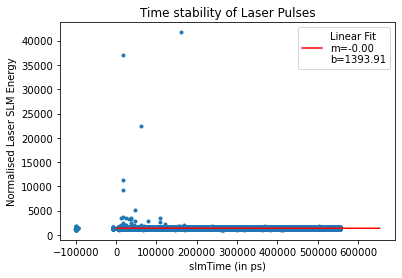

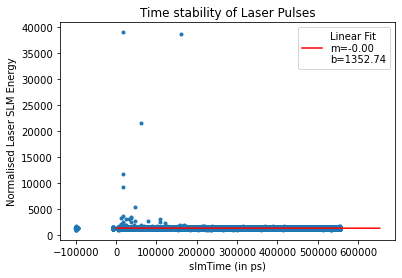

In [53]:
## looping the process for a calo 

calo = 1

for xtal in pd.unique(df['xtalNum']):
    df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal] 

    # check if it has an in-fill pulse & filter those without
    df_fills = df_xtal.groupby('fillNum').max().reset_index()
    syncFills = df_fills[df_fills['slmTime']>0]
    df_sags = df_xtal[df_xtal['fillNum'].isin(syncFills['fillNum'])]

    # pick the pulse with lowest SLM Time and store it's SLM energy
    result = df_sags.loc[df_sags.groupby('fillNum').idxmin()['slmTime']][['fillNum','slmEnergy']]
    result.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )

    # Normalise all other pulses' SLM energy in the given fill
    df_normal = df_xtal.merge(result, on='fillNum', how='right')
    
    # graph ratio of SiPM energy & normalized SLM energy -vs- time (p.s. add labels and axes)
    fig,ax = plt.subplots()
    ax.plot(df_normal['sipmTime'], df_normal['syncEnergy']*df_normal['sipmEnergy']/df_normal['slmEnergy'],".")
    ax.set_title("Time stability of Laser Pulses")
    ax.set_xlabel("sipmTime (in ps)")
    ax.set_ylabel("Normalised Laser SLM Energy")

    # fit a curve (linear for now) through the stability of time 
    def func(x,m,b):
        return m*x + b 

    initial_guess = [1.2, 0.03]
    pars, pcov = curve_fit(func, df_normal['slmTime'], df_normal['syncEnergy']*df_normal['sipmEnergy']/df_normal['slmEnergy'], p0=initial_guess)
    xfit = np.linspace(np.amin(df_normal['slmTime']),np.amax(df_normal['slmTime']))
    yfit = func(xfit, pars[0], pars[1])
    plt.plot(xfit,yfit,'r-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")
    plt.legend()

    # store time dependent coefficients and deviations in a 1D array
    slope_calo[xtal-1]=pars[0]
    std_calo[xtal-1] = np.sqrt(pcov[1,1])

    ## look into outliers
    ## time diff -vs- energy ratio plots 

In [54]:
print("Stabilities in Calo 1\n", slope_calo, '\n')
print("Chi square values of Corresponding Energy Ratios\n", std_calo, '\n')
# again df very large so chi-sq between 5-6 means more than 99.9% confidence

Stabilities in Calo 1
 [-2.66501312e-05 -2.55005679e-05 -2.68153583e-05 -2.23732473e-05
 -2.41862278e-05 -2.25385664e-05 -2.41433934e-05 -2.75626338e-05
 -2.00861915e-05 -2.34411205e-05 -2.56220890e-05 -2.20850933e-05
 -2.18853650e-05 -2.41414962e-05 -2.57929644e-05 -2.77444642e-05
 -2.15995828e-05 -2.03690180e-05 -2.22766835e-05 -2.39514745e-05
 -2.54821638e-05 -2.64963711e-05 -2.39646259e-05 -2.05913630e-05
 -2.67773774e-05 -2.43274466e-05 -2.40748883e-05 -1.79187929e-05
 -2.51032803e-05 -2.93651981e-05 -2.28148565e-05 -2.09153515e-05
 -2.80147775e-05 -2.47364918e-05 -2.24879152e-05 -2.35229875e-05
 -2.06877421e-05 -1.96535582e-05 -2.76283474e-05 -2.91248912e-05
 -2.90897889e-05 -2.43726694e-05 -2.42336996e-05 -2.38014322e-05
 -2.20826404e-05 -2.17233655e-05 -2.74635339e-05 -1.96349797e-05
 -2.23721881e-05 -2.93633278e-05 -2.03456072e-05 -2.63609878e-05
 -2.53849947e-05 -2.70612559e-05] 

Chi square values of Corresponding Energy Ratios
 [6.15403785 5.6905276  5.85294233 5.2891252  5

In [55]:
## looping the whole process for all calos

for calo in pd.unique(df['caloNum']):
    for xtal in pd.unique(df['xtalNum']):
        df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal] 

        # check if it has an in-fill pulse & filter those without
        df_fills = df_xtal.groupby('fillNum').max().reset_index()
        syncFills = df_fills[df_fills['slmTime']>0]
        df_sags = df_xtal[df_xtal['fillNum'].isin(syncFills['fillNum'])]

        # pick the pulse with lowest SLM Time and store it's SLM energy
        result = df_sags.loc[df_sags.groupby('fillNum').idxmin()['slmTime']][['fillNum','slmEnergy']]
        result.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )

        # Normalise all other pulses' SLM energy in the given fill
        df_normal = df_xtal.merge(result, on='fillNum', how='right')

        # fit a curve (linear for now) through the stability of time 


        def func(x,m,b):
            return m*x + b 

        initial_guess = [1.2, 0.03]
        pars, pcov = curve_fit(func, df_normal['slmTime'], df_normal['syncEnergy']*df_normal['sipmEnergy']/df_normal['slmEnergy'], p0=initial_guess)
        xfit = np.linspace(np.amin(df_normal['slmTime']),np.amax(df_normal['slmTime']))
        yfit = func(xfit, pars[0], pars[1])


        # store time dependent coefficients and deviations in a 2D array
        slope_all[calo-1][xtal-1]=pars[0]
        std_all[calo-1][xtal-1] = np.sqrt(pcov[1,1])



ValueError: `ydata` must not be empty!

In [ ]:
# reshape the various slopes into a list of arrays and print them as a colormap

arr = np.zeros((caloCount ,6,9))
    
for calo in pd.unique(df['caloNum']):
    arr[calo-1] = slope_all[calo-1].reshape(6,9)

plt.rcParams["figure.figsize"] = (18,9) 

plt.matshow(arr[16], cmap=plt.cm.Blues)
plt.colorbar()
 